In [28]:
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
!pip install factor_analyzer

^C


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
import os
if os.name != 'posix':
    plt.rc("font", family="Malgun Gothic")

### SK

In [30]:
sk_label=pd.read_csv('C:/Users/fiona/Desktop/SK_label.csv', encoding='UTF-8')

# PCA

1일 등락률이랑 상관관계 높은 변수
- 순매수_기관, 순매수_개인, 순매수_외국인, 기사감성점수, 코스피대비, 코스피등락률(대비x)

In [12]:
sk_x=sk_label[['순매수_기관','순매수_개인','순매수_외국인','기사감성점수','코스피대비','코스피등락률']]
sk_y=sk_label['등락률']

sk_x1=StandardScaler().fit_transform(sk_x)
sk_x_scaled=pd.DataFrame(sk_x1, columns=sk_x.columns)

In [13]:
pca=PCA(n_components=4)
principalComponents=pca.fit_transform(sk_x1)
sk_pca_df=pd.DataFrame(principalComponents)
pca.explained_variance_ratio_

array([0.51339718, 0.23273937, 0.13969395, 0.1101646 ])

In [14]:
sk_pca_df=sk_pca_df.iloc[:,0:4]
sk_pca_df.columns=['component1','component2','component3','component4']

In [15]:
sk_pca_df.head(5)

,component1,component2,component3,component4
0,-1.096160,0.627856,-0.031998,-0.510274
1,-0.291779,-0.191554,0.861148,-0.238872
2,-0.242967,-1.021956,0.955893,-0.061862
3,-0.204556,0.602281,1.107966,-0.873416
4,-0.889241,0.193789,1.023370,-0.283323


In [16]:
os.chdir('C:/Users/fiona/Desktop')
#sk_pca_df.to_csv('1일등락률&PCA_SK.csv',index=False)

3일 등락률이랑 상관관계 높은 변수
- 대비, 토론방, 순매수_기관, 순매수_개인, 순매수_외국인, 기사감성점수, 코스피대비, 코스피등락률

In [17]:
sk3_x=sk_label[['대비','토론방','순매수_기관','순매수_개인','순매수_외국인','기사감성점수','코스피대비','코스피등락률']]
sk3_y=sk_label['3일 등락률']

sk3_x1=StandardScaler().fit_transform(sk3_x)
sk3_x_scaled=pd.DataFrame(sk3_x1, columns=sk3_x.columns)

In [18]:
pca=PCA(n_components=4)
principalComponents=pca.fit_transform(sk3_x1)
sk3_pca_df=pd.DataFrame(principalComponents)
pca.explained_variance_ratio_

array([0.49525168, 0.19384371, 0.11954599, 0.08757327])

In [19]:
sk3_pca_df=sk3_pca_df.iloc[:,0:3]
sk3_pca_df.columns=['component1','component2','component3']

In [20]:
sk3_pca_df.head(5)

,component1,component2,component3
0,-1.161814,0.769259,-0.075086
1,-0.446447,-0.263649,0.436299
2,-0.520573,-0.771171,1.184818
3,-0.161706,0.517396,0.345913
4,-1.270225,0.297840,0.751210


In [21]:
#sk3_pca_df.to_csv('3일등락률&PCA_SK.csv',index=False)

# 요인 분석

1일 등락률이랑 상관관계 높은 변수
- 순매수_기관, 순매수_개인, 순매수_외국인, 기사감성점수, 코스피대비, 코스피등락률(대비x)

In [22]:
#bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(sk_x)
p_value

0.0

In [23]:
#kmo test
kmo_all,kmo_model=calculate_kmo(sk_x)
kmo_model

0.45804712829546035

In [24]:
fa=FactorAnalyzer(n_factors=6, rotation=None)
fa.fit(sk_x)
ev,v=fa.get_eigenvalues()

In [25]:
ev

array([3.08038306, 1.3964362 , 0.83816368, 0.66098759, 0.01981662,
       0.00421285])

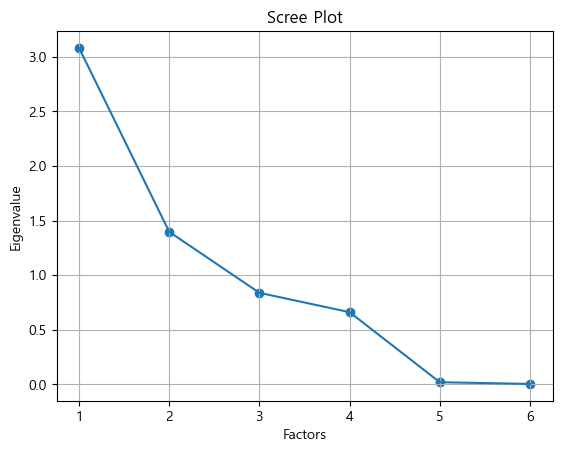

In [26]:
plt.scatter(range(1,sk_x.shape[1]+1),ev)
plt.plot(range(1,sk_x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [27]:
fa=FactorAnalyzer(n_factors=2, rotation='varimax') #ml:최대우도 방법
fa.fit(sk_x)
fa_result=pd.DataFrame(fa.loadings_, index=sk_x.columns)
fa_result

,0,1
순매수_기관,0.220908,0.423466
순매수_개인,-0.182368,-1.031306
순매수_외국인,0.122323,0.758554
기사감성점수,0.451981,0.204344
코스피대비,0.982475,0.189758
코스피등락률,0.959315,0.162187


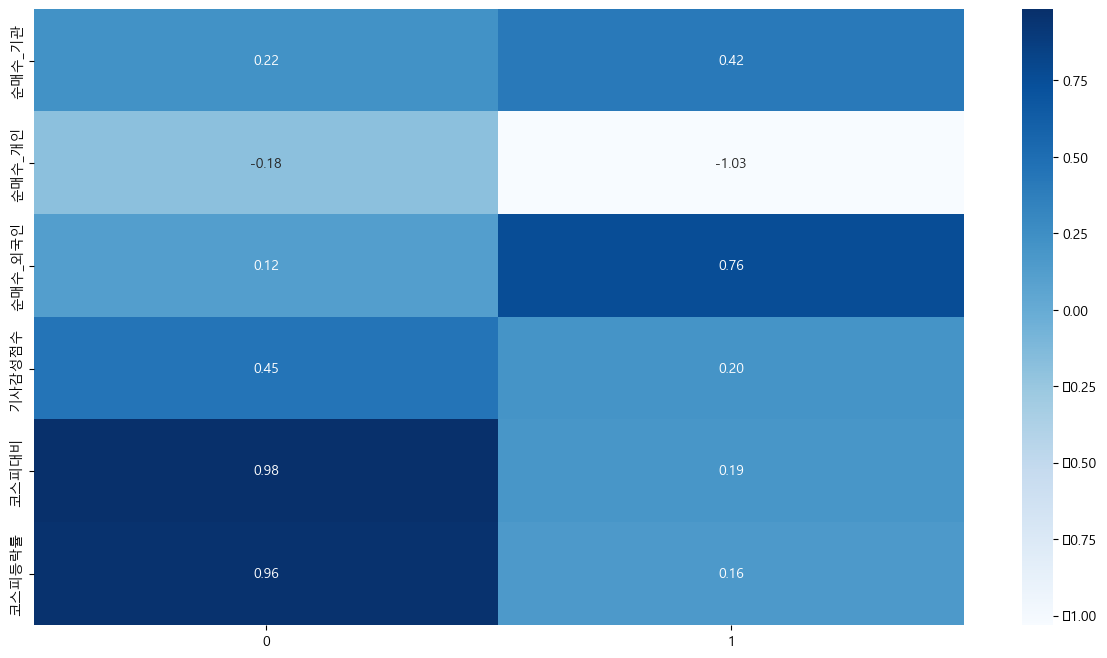

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(fa_result, cmap='Blues', annot=True, fmt='.2f')

In [29]:
fa=FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(sk_x)
df=pd.DataFrame(fa.get_factor_variance())
df.index=['ss loadings','proportion var','cumulative var']
df

,0,1
ss loadings,2.186849,1.922389
proportion var,0.364475,0.320398
cumulative var,0.364475,0.684873


In [30]:
#68% 누적분산 설명

In [31]:
sk_x_transform=fa.fit_transform(sk_x)
sk_x_transform.shape

(1429, 2)

In [32]:
sk_transform=pd.DataFrame(sk_x_transform)

In [33]:
os.chdir('C:/Users/fiona/Desktop')
#sk_transform.to_csv('1일등락률&FA_SK.csv',index=False)

3일 등락률이랑 상관관계 높은 변수
- 대비, 토론방, 순매수_기관, 순매수_개인, 순매수_외국인, 기사감성점수, 코스피대비, 코스피등락률

In [34]:
#bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(sk3_x)
p_value

0.0

In [35]:
#kmo test
kmo_all,kmo_model=calculate_kmo(sk3_x)
kmo_model

0.6024395495459589

In [36]:
fa=FactorAnalyzer(n_factors=8, rotation=None)
fa.fit(sk3_x)
ev,v=fa.get_eigenvalues()

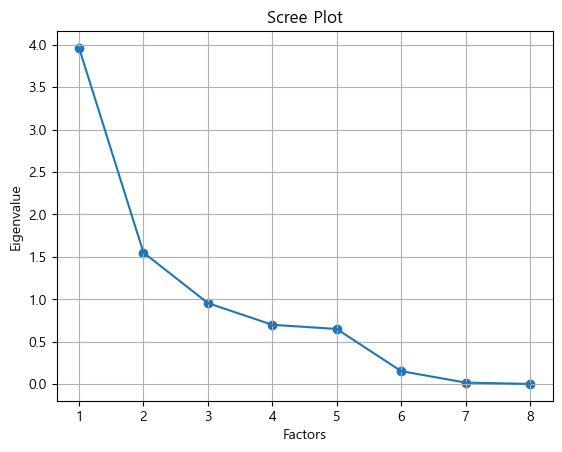

In [37]:
plt.scatter(range(1,sk3_x.shape[1]+1),ev)
plt.plot(range(1,sk3_x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [38]:
fa=FactorAnalyzer(n_factors=2, rotation='varimax') #ml:최대우도 방법
fa.fit(sk3_x)
fa_result=pd.DataFrame(fa.loadings_, index=sk3_x.columns)
fa_result

,0,1
대비,0.573680,0.675067
토론방,-0.022047,-0.382322
순매수_기관,0.267733,0.410700
순매수_개인,-0.232779,-0.999265
순매수_외국인,0.144874,0.819080
기사감성점수,0.461133,0.179257
코스피대비,0.987930,0.141608
코스피등락률,0.959215,0.121042


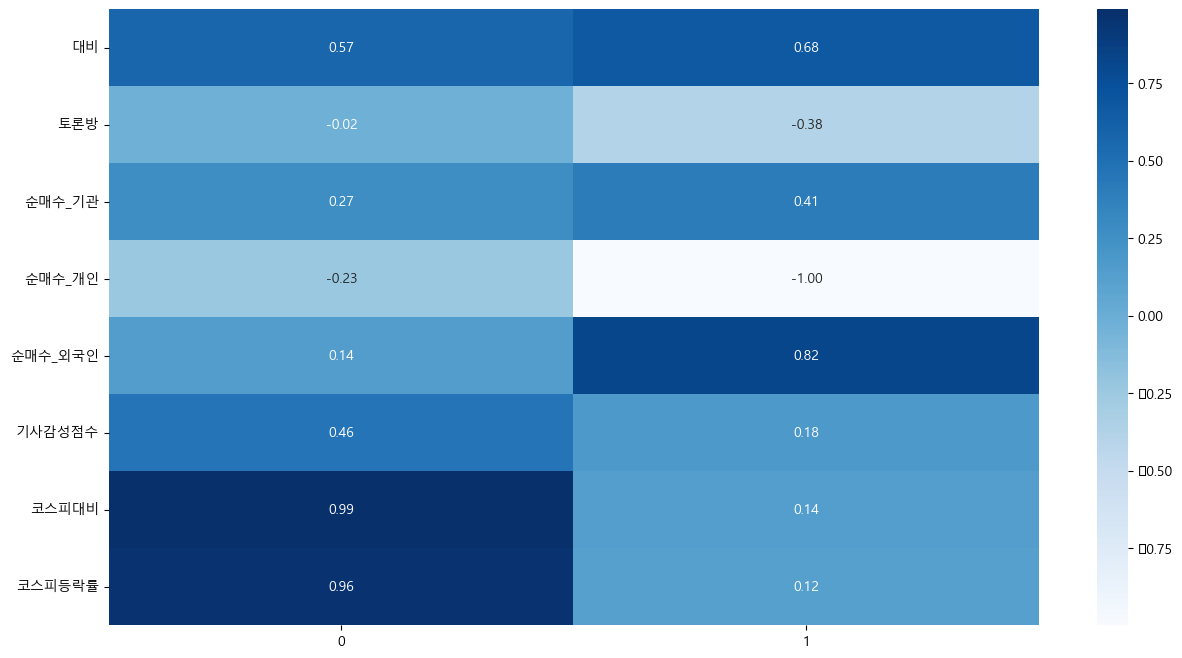

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(fa_result, cmap='Blues', annot=True, fmt='.2f')

In [40]:
fa=FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(sk3_x)
df=pd.DataFrame(fa.get_factor_variance())
df.index=['ss loadings','proportion var','cumulative var']
df

,0,1
ss loadings,2.585194,2.506820
proportion var,0.323149,0.313352
cumulative var,0.323149,0.636502


In [41]:
#63% 설명

In [42]:
sk3_x_transform=fa.fit_transform(sk3_x)
sk3_x_transform.shape

(1429, 2)

In [43]:
sk3_transform=pd.DataFrame(sk3_x_transform)

In [44]:
#sk3_transform.to_csv('3일등락률&FA_SK.csv',index=False)

# x변수 간 상관관계

1일 등락률

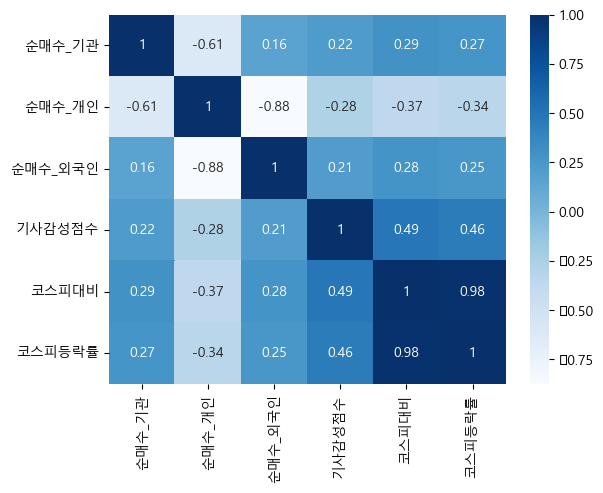

In [45]:
sns.heatmap(sk_x.corr(),cmap='Blues',annot=True)

- 순매수_기관&개인
- 순매수_개인&외국인
- 코스피_대비&등락률

- 순매수_기관, 코스피_대비 drop

In [46]:
sk_x1=sk_x.drop(['순매수_기관','코스피대비'],axis=1)
sk_x1.head(3)

,순매수_개인,순매수_외국인,기사감성점수,코스피등락률
0,-1.325185e+10,8.168180e+09,0.590909,0.71
1,-1.694931e+10,-1.667742e+10,0.352941,-0.09
2,-5.105465e+10,8.727358e+09,0.227273,-0.46


In [47]:
#sk_x1.to_csv('1일등락률&corr_SK.csv',index=False)

3일 등락률

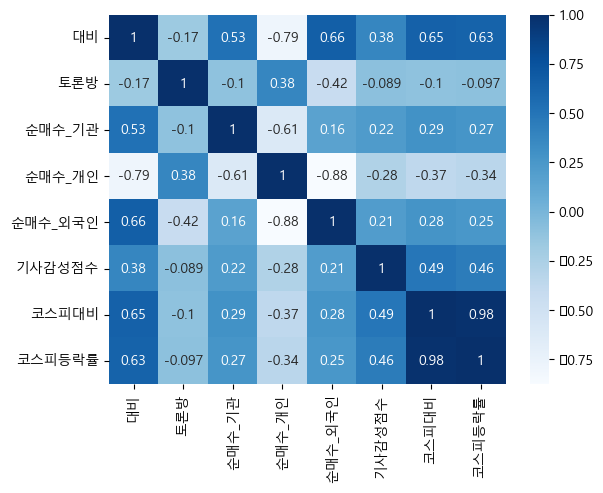

In [48]:
sns.heatmap(sk3_x.corr(),cmap='Blues',annot=True)

- 대비&순매수_기관,개인,외국인,코스피대비,등락률
- 순매수_개인&외국인
- 코스피대비&코스피등락률

- 대비, 순매수_외국인, 코스피_대비 drop

In [49]:
sk3_x1=sk3_x.drop(['대비','순매수_외국인','코스피대비'],axis=1)
#sk3_x1.to_csv('3일등락률&corr_SK.csv',index=False)

# var없이 요인분석

In [50]:
sk_drop=sk_label.drop(['날짜','year','month','day','등락률','3일 등락률','day1_label','day3_label'],axis=1)

In [51]:
fa=FactorAnalyzer(n_factors=40, rotation=None)
fa.fit(sk_drop)
ev,v=fa.get_eigenvalues()

In [52]:
ev

array([ 8.13561888e+00,  6.11988491e+00,  4.79552751e+00,  4.03899658e+00,
        2.43134783e+00,  2.07436707e+00,  1.54529882e+00,  1.19994396e+00,
        1.04219278e+00,  9.94164135e-01,  9.51279852e-01,  8.74740631e-01,
        7.55973538e-01,  6.48596867e-01,  5.34203702e-01,  4.32689748e-01,
        4.19272590e-01,  3.65495922e-01,  2.96936471e-01,  2.67001336e-01,
        1.95265048e-01,  1.75360953e-01,  1.49357564e-01,  1.45102023e-01,
        1.08725515e-01,  9.26929087e-02,  5.53537056e-02,  4.30190286e-02,
        3.49237333e-02,  2.44841019e-02,  1.94588543e-02,  1.60761893e-02,
        1.36869217e-02,  1.64323202e-03,  7.39100598e-04,  5.75251039e-04,
        2.72659005e-06, -9.66224002e-17, -5.00608171e-16])

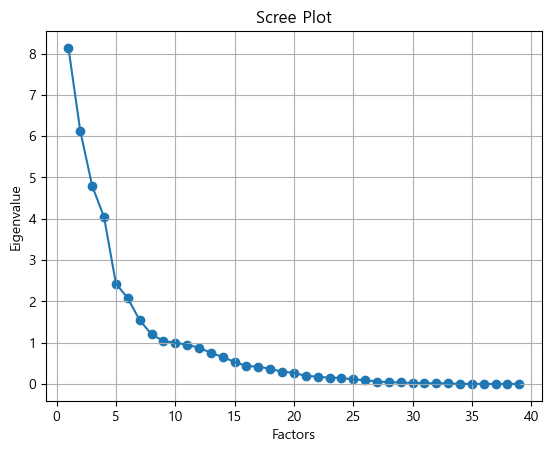

In [53]:
plt.scatter(range(1,sk_drop.shape[1]+1),ev)
plt.plot(range(1,sk_drop.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [54]:
fa=FactorAnalyzer(n_factors=10, rotation='varimax') #ml:최대우도 방법
fa.fit(sk_drop)
fa_result=pd.DataFrame(fa.loadings_, index=sk_drop.columns)
fa_result

,0,1,2,3,4,5,6,7,8,9
종가,0.946250,0.107735,-0.078900,0.036418,-0.040646,0.107898,0.004747,0.008426,0.131280,-0.059165
대비,0.015180,0.001717,-0.009874,0.758240,-0.007311,-0.009338,0.072347,0.488856,-0.039254,0.053768
거래량,0.087310,-0.047233,-0.157050,-0.048605,-0.098171,-0.077847,0.935087,-0.041018,0.019418,-0.065298
거래대금,0.473337,-0.006851,-0.202372,-0.034318,-0.094302,0.002938,0.821662,-0.032215,0.073834,-0.089142
시가총액,0.946250,0.107735,-0.078900,0.036418,-0.040646,0.107898,0.004747,0.008426,0.131280,-0.059165
외국인 보유수량,-0.073715,-0.046578,0.067707,-0.028852,0.090362,0.976612,-0.085943,0.010493,0.073455,-0.054750
외국인 지분율,-0.073753,-0.046538,0.067681,-0.028798,0.090336,0.976563,-0.085957,0.010483,0.073448,-0.054783
토론방,-0.079429,0.087451,0.018236,-0.352466,-0.059310,-0.260202,0.655134,0.013626,-0.124301,0.028797
순매수_기관,-0.132671,-0.013383,0.067038,0.463852,-0.056614,-0.003807,0.065421,0.210106,0.106848,0.153118
순매수_기타법인,-0.112526,0.033430,-0.011134,-0.187022,-0.003408,0.010366,0.037081,0.012979,0.009354,-0.257407


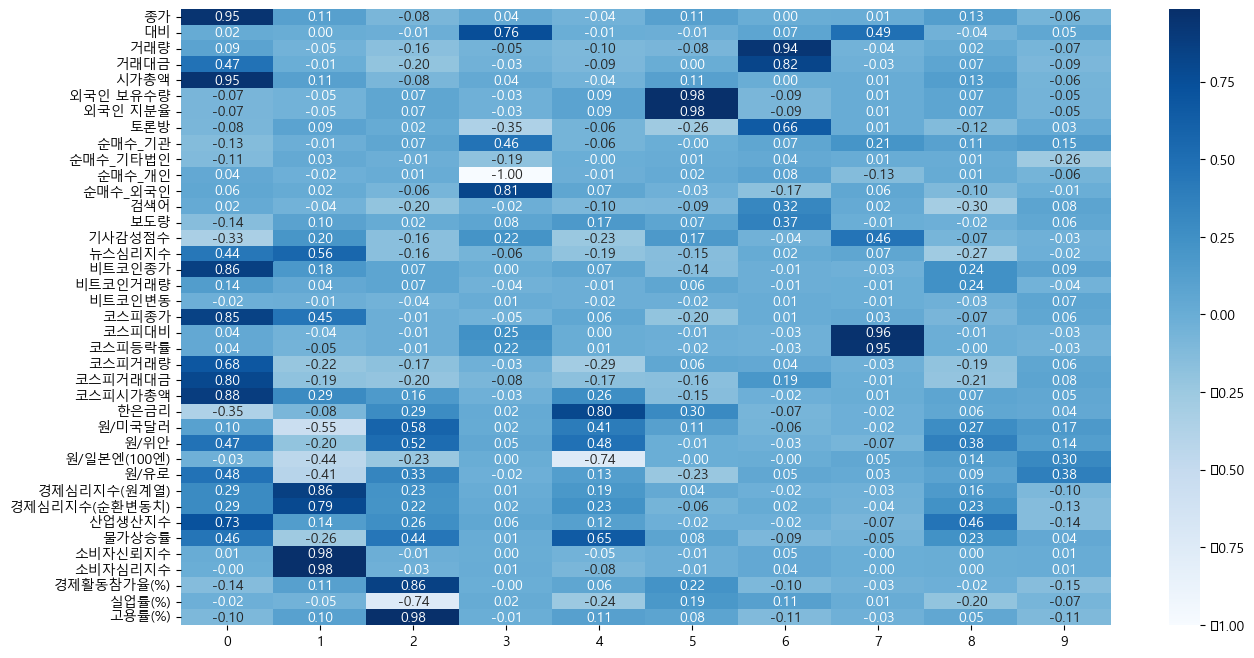

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(fa_result, cmap='Blues', annot=True, fmt='.2f')

- 요인 0 : 종가, 시가총액, 비트코인종가, 코스피종가, 코스피거래량, 코스피거래대금, 코스피시가총액, (산업생산지수)
- 요인 1 : 경제심리지수(원),경제심리지수(순환), 소비자신뢰지수, 소비자심리지수
- 요인 2 : 경제활동참가율, 실업률, 고용률
- 요인 3 : 대비, 순매수_개인, 순매수_외국인
- 요인 4 : 한은금리, 원/일본엔, 물가상승률
- 요인 5 : 외국인 보유수량, 외국인 지분율
- 요인 6 : 거래량, 거래대금, (토론방)
- 요인 7 : 코스피대비, 코스피등락률

In [56]:
fa=FactorAnalyzer(n_factors=8, rotation='varimax')

In [57]:
sk_drop_transform=fa.fit_transform(sk_drop)
sk_drop_transform.shape

(1429, 8)

In [58]:
sk_drop_fa=pd.DataFrame(sk_drop_transform)

In [59]:
#sk_drop_fa.to_csv('FA_SK.csv',index=False)

# VIF

In [31]:
sk_label.columns

Index(['날짜', 'year', 'month', 'day', '종가', '대비', '등락률', '거래량', '거래대금', '시가총액',
       '외국인 보유수량', '외국인 지분율', '토론방', '순매수_기관', '순매수_기타법인', '순매수_개인', '순매수_외국인',
       '검색어', '보도량', '기사감성점수', '뉴스심리지수', '비트코인종가', '비트코인거래량', '비트코인변동',
       '코스피종가', '코스피대비', '코스피등락률', '코스피거래량', '코스피거래대금', '코스피시가총액', '한은금리',
       '원/미국달러', '원/위안', '원/일본엔(100엔)', '원/유로', '경제심리지수(원계열)', '경제심리지수(순환변동치)',
       '산업생산지수', '물가상승률', '소비자신뢰지수', '소비자심리지수', '경제활동참가율(%)', '실업률(%)',
       '고용률(%)', 'day1_label', '3일 등락률', 'day3_label'],
      dtype='object')

In [32]:
x=sk_label.drop(['날짜','year','month','day','대비','코스피대비','day1_label','day3_label','등락률','3일 등락률'],axis=1)

In [33]:
pd.options.display.float_format='{:.5f}'.format

In [34]:
def VIF(x):
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(x.values,i)
                      for i in range(x.shape[1])]
    vif['Feature']=x.columns
    return vif
vif=VIF(x)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,inf,종가
1,inf,순매수_기관
2,inf,순매수_기타법인
3,inf,순매수_개인
4,inf,순매수_외국인
5,62118615549937.87500,시가총액
6,182854.15710,외국인 지분율
7,103909.10361,외국인 보유수량
8,831.39388,소비자신뢰지수
9,778.40053,소비자심리지수


In [36]:
x1=x.drop('종가',axis=1)
vif=VIF(x1)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,inf,순매수_기관
1,inf,순매수_기타법인
2,inf,순매수_개인
3,inf,순매수_외국인
4,182853.50894,외국인 지분율
5,29459.83999,외국인 보유수량
6,831.41365,소비자신뢰지수
7,778.37262,소비자심리지수
8,708.71512,고용률(%)
9,297.03985,경제활동참가율(%)


In [37]:
#순매수_외국인,개인,기관은 등락률과 상관관계 있었음
x2=x1.drop('순매수_기타법인',axis=1)
vif=VIF(x2)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,182853.50895,외국인 지분율
1,29459.98774,외국인 보유수량
2,831.41365,소비자신뢰지수
3,778.37262,소비자심리지수
4,709.41236,고용률(%)
5,254.37988,경제활동참가율(%)
6,165.29256,코스피시가총액
7,159.58762,순매수_개인
8,120.01070,코스피종가
9,104.71106,순매수_외국인


In [38]:
x3=x2.drop('외국인 지분율',axis=1)
vif=VIF(x3)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,831.41365,소비자신뢰지수
1,778.37261,소비자심리지수
2,709.40707,고용률(%)
3,254.37508,경제활동참가율(%)
4,165.29256,코스피시가총액
5,159.58761,순매수_개인
6,120.01070,코스피종가
7,104.71106,순매수_외국인
8,80.39325,실업률(%)
9,38.08776,순매수_기관


In [39]:
x4=x3.drop('소비자신뢰지수',axis=1)
vif=VIF(x4)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,706.14610,고용률(%)
1,335.34441,경제활동참가율(%)
2,164.51661,코스피시가총액
3,159.13837,순매수_개인
4,117.87032,코스피종가
5,104.26780,순매수_외국인
6,77.54846,실업률(%)
7,38.03029,순매수_기관
8,32.78840,거래대금
9,27.61576,물가상승률


In [40]:
x5=x4.drop('고용률(%)',axis=1)
vif=VIF(x5)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,164.86717,코스피시가총액
1,159.16664,순매수_개인
2,117.96015,코스피종가
3,104.30529,순매수_외국인
4,38.02527,순매수_기관
5,32.82224,거래대금
6,27.41685,물가상승률
7,24.56654,거래량
8,23.24862,원/위안
9,23.08316,경제심리지수(원계열)


In [41]:
x6=x5.drop('코스피시가총액',axis=1)
vif=VIF(x6)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,157.04129,순매수_개인
1,102.73005,순매수_외국인
2,37.55300,순매수_기관
3,32.82413,거래대금
4,25.17484,코스피종가
5,24.53716,거래량
6,23.29188,물가상승률
7,22.98934,경제심리지수(원계열)
8,20.32089,시가총액
9,19.43833,한은금리


In [42]:
x7=x6.drop('거래대금',axis=1)
vif=VIF(x7)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,156.67874,순매수_개인
1,102.53233,순매수_외국인
2,37.51432,순매수_기관
3,24.88089,코스피종가
4,23.10635,물가상승률
5,22.90159,경제심리지수(원계열)
6,19.14345,한은금리
7,18.85568,원/미국달러
8,18.50480,원/위안
9,15.32655,경제심리지수(순환변동치)


In [43]:
x8=x7.drop('코스피종가',axis=1)
def VIF(x8):
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(x8.values,i)
                      for i in range(x8.shape[1])]
    vif['Feature']=x8.columns
    return vif
vif=VIF(x8)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,156.30241,순매수_개인
1,102.34222,순매수_외국인
2,37.48560,순매수_기관
3,22.80372,경제심리지수(원계열)
4,21.71809,물가상승률
5,19.01759,한은금리
6,18.49104,원/위안
7,17.83892,원/미국달러
8,14.01126,소비자심리지수
9,12.29932,경제심리지수(순환변동치)


In [44]:
x9=x8.drop('경제심리지수(원계열)',axis=1)
vif=VIF(x9)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,154.91671,순매수_개인
1,101.43847,순매수_외국인
2,37.04815,순매수_기관
3,21.54373,물가상승률
4,19.01656,한은금리
5,18.21866,원/위안
6,16.99483,원/미국달러
7,10.96848,시가총액
8,9.16208,비트코인종가
9,8.93748,경제심리지수(순환변동치)


In [45]:
x10=x9.drop('물가상승률',axis=1)
def VIF(x8):
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(x8.values,i)
                      for i in range(x8.shape[1])]
    vif['Feature']=x8.columns
    return vif
vif=VIF(x10)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,154.43741,순매수_개인
1,101.09833,순매수_외국인
2,36.95318,순매수_기관
3,17.70465,원/위안
4,16.77839,원/미국달러
5,11.05503,한은금리
6,10.60711,시가총액
7,8.56899,비트코인종가
8,8.25418,경제심리지수(순환변동치)
9,6.81703,원/일본엔(100엔)


In [46]:
x11=x10.drop('원/위안',axis=1)
def VIF(x8):
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(x8.values,i)
                      for i in range(x8.shape[1])]
    vif['Feature']=x8.columns
    return vif
vif=VIF(x11)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,140.36202,순매수_개인
1,91.51443,순매수_외국인
2,33.43909,순매수_기관
3,10.90467,한은금리
4,10.44849,시가총액
5,8.55440,비트코인종가
6,8.22572,원/미국달러
7,8.03915,경제심리지수(순환변동치)
8,6.81028,원/일본엔(100엔)
9,6.34988,소비자심리지수


In [47]:
x12=x11.drop('한은금리',axis=1)
def VIF(x8):
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(x8.values,i)
                      for i in range(x8.shape[1])]
    vif['Feature']=x8.columns
    return vif
vif=VIF(x12)
vif=vif.sort_values(by='VIF_Factor',ascending=False)
vif=vif.reset_index()
vif.drop('index',axis=1,inplace=True)
vif

,VIF_Factor,Feature
0,139.69741,순매수_개인
1,90.93103,순매수_외국인
2,33.21797,순매수_기관
3,8.00649,경제심리지수(순환변동치)
4,7.99052,시가총액
5,7.64234,비트코인종가
6,7.50196,원/미국달러
7,6.30790,소비자심리지수
8,5.64174,코스피거래대금
9,4.65337,산업생산지수


In [50]:
list(vif.Feature)

['순매수_개인',
 '순매수_외국인',
 '순매수_기관',
 '경제심리지수(순환변동치)',
 '시가총액',
 '비트코인종가',
 '원/미국달러',
 '소비자심리지수',
 '코스피거래대금',
 '산업생산지수',
 '코스피거래량',
 '뉴스심리지수',
 '원/유로',
 '토론방',
 '실업률(%)',
 '원/일본엔(100엔)',
 '거래량',
 '기사감성점수',
 '외국인 보유수량',
 '코스피등락률',
 '경제활동참가율(%)',
 '검색어',
 '보도량',
 '비트코인거래량',
 '비트코인변동']

In [ ]:
#순매수_개인제거한다면...

In [49]:
x13=x12.drop('순매수_개인',axis=1)
vif1=VIF(x13)
vif1=vif1.sort_values(by='VIF_Factor',ascending=False)
vif1=vif1.reset_index()
vif1.drop('index',axis=1,inplace=True)
vif1

,VIF_Factor,Feature
0,8.00418,경제심리지수(순환변동치)
1,7.98921,시가총액
2,7.64214,비트코인종가
3,7.29968,원/미국달러
4,6.19860,소비자심리지수
5,5.62670,코스피거래대금
6,4.63812,산업생산지수
7,3.23101,코스피거래량
8,2.89718,뉴스심리지수
9,2.85151,원/유로
